## Exercise 4 

In [1]:
# libraries

import geopandas as gpd
import pathlib

In [2]:
# notebook

# Notebook path
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / 'data'



sq_data = gpd.read_file(DATA_DIRECTORY / 'HBF_85817_geo_u.gpkg')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
sq_data.head()

,taxonomic_order,formatted_taxon_name,abundance_verbatim,formatted_date_time,country,bio_province_interpreted,locality,collection_name,team,year,geometry
0,64441,Siberian Flying Squirrel — Pteromys volans,None,2024-03-23 [19:00],Suomi,Uusimaa (U),None,"Lajitietokeskus/FinBIF - Notebook, general obs...",Olli Raitio,2024,POINT (24.92513 60.17041)
1,64441,Siberian Flying Squirrel — Pteromys volans,1,2024-03-20,Suomi,Uusimaa (U),"Eläintarhan koirapuisto, Töölö",Löydös Open Finnish Observation Database,None,2024,POINT (25.01864 60.11016)
2,64441,Siberian Flying Squirrel — Pteromys volans,1,2024-03-20,Suomi,Uusimaa (U),None,Löydös Open Finnish Observation Database,kristiina boström-förström,2024,POINT (22.97703 59.77408)
3,64441,Siberian Flying Squirrel — Pteromys volans,1,2024-03-20,Suomi,Uusimaa (U),None,Löydös Open Finnish Observation Database,Kristiina Boström-Förström,2024,POINT (22.97703 59.77408)
4,64441,Siberian Flying Squirrel — Pteromys volans,1,2024-03-13 [12:07-12:07],Suomi,Uusimaa (U),None,"Lajitietokeskus/FinBIF - Notebook, general obs...",Otso Häärä,2024,POINT (24.93557 60.29196)


In [4]:
type(sq_data)

geopandas.geodataframe.GeoDataFrame

In [5]:
len(sq_data['year'].unique())

54

In [6]:
sq_data.count()

taxonomic_order             9974
formatted_taxon_name        9974
abundance_verbatim          1964
formatted_date_time         9974
country                     9974
bio_province_interpreted    9974
locality                    8208
collection_name             9974
team                        2105
year                        9974
geometry                    9974
dtype: int64

In [7]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [8]:
import pandas as pd
import plotly.express as px

In [9]:
# Convert the 'ACQ_DATE' column to datetime format for easier manipulation
#sq_data['formatted_date_time'] = pd.to_datetime(sq_data['formatted_date_time'])

In [10]:
# drop all rows before 1970
sq_data = sq_data.drop(sq_data[sq_data['year'] < 1970].index)

In [11]:
# dropping rows that are not in uusimaa
sq_data = sq_data.drop(sq_data[sq_data['bio_province_interpreted'] != 'Uusimaa (U)'].index)

In [12]:
sq_data['bio_province_interpreted'].unique()

array(['Uusimaa (U)'], dtype=object)

In [13]:
sq_data.count()

taxonomic_order             7981
formatted_taxon_name        7981
abundance_verbatim          1579
formatted_date_time         7981
country                     7981
bio_province_interpreted    7981
locality                    6592
collection_name             7981
team                        1918
year                        7981
geometry                    7981
dtype: int64

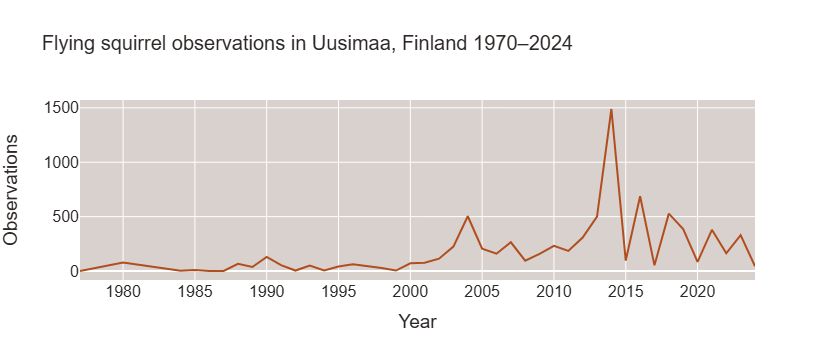

In [15]:
# plot


# Aggregate by year
sq_data_year = sq_data.groupby('year').size().reset_index(name='Occurrences')

# Create a time series line chart to visualize the trend over the years
fig = px.line(sq_data_year,
              x='year',
              y='Occurrences',
              title='Flying squirrel observations in Uusimaa, Finland 1970–2024',
              labels={'year': 'Year', 'Occurrences': 'Observations'},
              color_discrete_sequence=['#B14E20'])  # Color for the line
# Update layout for better visualization
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Observations'
)

fig.update_layout(
    plot_bgcolor='#D8D1CD',   # Plot area background
    paper_bgcolor='white',  # Entire figure background
    font=dict(
        family='Helvetica, sans-serif',
        size=16,
        color='#2B2725'
    ),
    title_font=dict(
        size=20,
        family='Helvetica',
        color='#2B2725'
    )
)

fig.write_html(DATA_DIRECTORY / "squirrel_chart.html")

# Show the figure
fig.show()


In [16]:
# Load your data
sq_data2 = gpd.read_file(DATA_DIRECTORY / 'HBF_85817_geo_u.gpkg')

In [17]:
# creatong separate column for lat and lon

longitude = []
latitude = []



for index, row in sq_data2.iterrows():
    point = row['geometry']
    longitude.append(point.x)
    latitude.append(point.y)

sq_data2["longitude"] = longitude
sq_data2["latitude"] = latitude

In [18]:
sq_data2.head()

,taxonomic_order,formatted_taxon_name,abundance_verbatim,formatted_date_time,country,bio_province_interpreted,locality,collection_name,team,year,geometry,longitude,latitude
0,64441,Siberian Flying Squirrel — Pteromys volans,None,2024-03-23 [19:00],Suomi,Uusimaa (U),None,"Lajitietokeskus/FinBIF - Notebook, general obs...",Olli Raitio,2024,POINT (24.92513 60.17041),24.925127,60.170408
1,64441,Siberian Flying Squirrel — Pteromys volans,1,2024-03-20,Suomi,Uusimaa (U),"Eläintarhan koirapuisto, Töölö",Löydös Open Finnish Observation Database,None,2024,POINT (25.01864 60.11016),25.018642,60.110161
2,64441,Siberian Flying Squirrel — Pteromys volans,1,2024-03-20,Suomi,Uusimaa (U),None,Löydös Open Finnish Observation Database,kristiina boström-förström,2024,POINT (22.97703 59.77408),22.977033,59.774082
3,64441,Siberian Flying Squirrel — Pteromys volans,1,2024-03-20,Suomi,Uusimaa (U),None,Löydös Open Finnish Observation Database,Kristiina Boström-Förström,2024,POINT (22.97703 59.77408),22.977033,59.774082
4,64441,Siberian Flying Squirrel — Pteromys volans,1,2024-03-13 [12:07-12:07],Suomi,Uusimaa (U),None,"Lajitietokeskus/FinBIF - Notebook, general obs...",Otso Häärä,2024,POINT (24.93557 60.29196),24.935570,60.291959


In [19]:
sq_data2["bio_province_interpreted"].unique()

array(['Uusimaa (U)', 'Varsinais-Suomi (V)',
       'Etelä-Häme (EH), Varsinais-Suomi (V)',
       'Etelä-Häme (EH), Uusimaa (U), Varsinais-Suomi (V)',
       'Etelä-Häme (EH), Uusimaa (U)',
       'Etelä-Häme (EH), Etelä-Karjala (EK), Etelä-Savo (ES), Uusimaa (U)',
       'Uusimaa (U), Varsinais-Suomi (V)', 'Etelä-Häme (EH)'],
      dtype=object)

In [20]:
# interactive map

import pandas as pd
import folium
from folium.plugins import HeatMap


# Initialize a base map
map = folium.Map(location=[sq_data2['latitude'].mean(), sq_data2['longitude'].mean()], zoom_start=8)

# If we had an intensity measure (e.g., 'FIRE_INTENSITY'), we could use it here; otherwise, just use lat, lon
heat_data = [[row['latitude'], row['longitude']] for index, row in sq_data2.iterrows()]

# Add a heatmap layer
HeatMap(heat_data).add_to(map)

# Save the map to an HTML file (optional)
#map.save('html/wildfire_heatmap.html')

# Display the map
map

   animation_frame='ACQ_DATE',


   # Customize slider
fig.update_layout(
    sliders=[dict(
        currentvalue={"prefix": "Date: "},
        len=0.4,
        x=0.3,
        y=-0.2,
    )],
    title={
        'text': "Fire Occurrences",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)




# Focus on Finland and add borders
fig.update_geos(
    center={"lat": 60.2, "lon": 24.9},
    projection_scale=150,
    resolution=50,
    showcoastlines=True, coastlinecolor="gray",
    showland=True, landcolor="#CEE4C1",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="lightblue",
    showrivers=True, rivercolor="#18AFCA",
    showcountries=True, countrycolor="black" 
)

# Focus on Finland and add borders
fig.update_geos(
    center={"lat": 60.2, "lon": 24.9},
    projection_scale=150,
    resolution=50,
    showcoastlines=True, coastlinecolor="gray",
    showland=True, landcolor="#CEE4C1",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="lightblue",
    showrivers=True, rivercolor="#18AFCA",
    showcountries=True, countrycolor="black" 
)


# Generate animated map
fig = px.choropleth(data_frame=aggregated_data,
                    geojson=finland_geojson,
                    locations="NAMEFIN",  # Specify the column containing region names
                    featureidkey="properties.NAMEFIN",
                    color="incidents_cls",
                    animation_frame="year",
                    scope="europe",
                    height=600,
                    title="Fire Incidents in Finland Regions Over Time",
                    labels={'incidents':'Number of Incidents'},
                    color_continuous_scale=color_scale,
                    range_color=(min, max)
                   )



# Update map projection and centering on Finland
fig.update_geos(fitbounds="locations", visible=False)


In [21]:
longitude = []
latitude = []



for index, row in sq_data.iterrows():
    point = row['geometry']
    longitude.append(point.x)
    latitude.append(point.y)

sq_data["longitude"] = longitude
sq_data["latitude"] = latitude

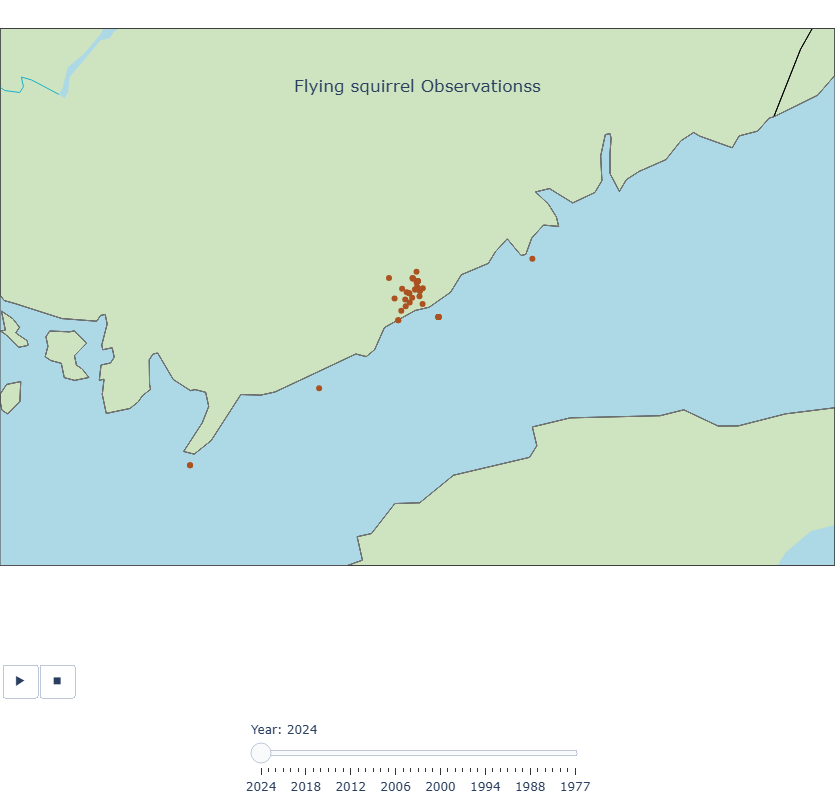

In [22]:

# Create the map
fig = px.scatter_geo(sq_data,
                     lat='latitude',
                     lon='longitude',
                     hover_name='year',
                     animation_frame="year",
                     color_discrete_sequence=['#AB5220'],
                     projection="conic conformal",
                     title="Flying squirrel observations in Uusimaa, Finland",
                     width=800,
                     height=600)


# Make dots smaller
fig.update_traces(marker=dict(size=6))


# Customize slider
fig.update_layout(
    sliders=[dict(
        currentvalue={"prefix": "Year: "},
        len=0.4,
        x=0.3,
        y=-0.2,
    )],
    title={
        'text': "Flying squirrel Observationss",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Focus on Finland and add borders
fig.update_geos(
    center={"lat": 60.2, "lon": 24.9},
    projection_scale=150,
    resolution=50,
    showcoastlines=True, coastlinecolor="gray",
    showland=True, landcolor="#CEE4C1",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="lightblue",
    showrivers=True, rivercolor="#18AFCA",
    showcountries=True, countrycolor="black" 
)


fig.update_layout(
    margin={"r":0, "t":0, "l":0, "b":0},
    height=800,  # You can adjust the height and width to give more space to the map area
    sliders=[{'pad':{"t": 5}}]  # Adjust the slider's position to be less intrusive
)
fig.show()
# Show the map
#fig.show()

# save the figure to an HTML file:
# fig.write_html("path_to_save/fire_occurrences_map_over_time_focused_on_finland.html")

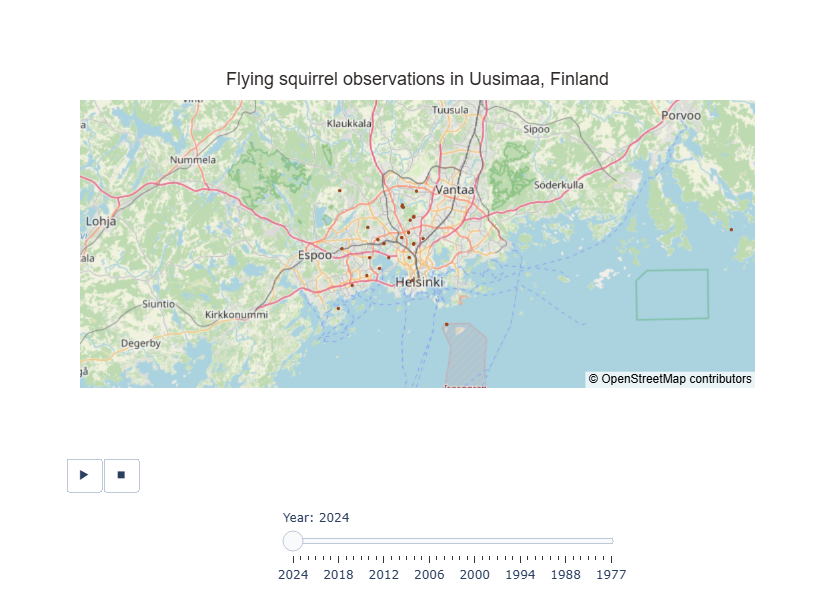

In [24]:

fig = px.scatter_mapbox(sq_data,
                     lat='latitude',
                     lon='longitude',
                     hover_name='year',
                        hover_data=['year', 'team'],
                        animation_frame="year",
                        color_discrete_sequence=['#A0461D'],
                        title="mep",
                        mapbox_style="open-street-map",
                        zoom=8,
                        center={"lat": 60.22, "lon": 24.9384},
                     width=800,
                     height=600)

# Make dots smaller
fig.update_traces(marker=dict(size=4))


# Customize slider
fig.update_layout(
    title_font=dict(
        size=18,
        family='Helvetica',
        color='#2B2725'
    ),
    sliders=[dict(
        currentvalue={"prefix": "Year: "},
        len=0.5,
        x=0.3,
        y=-0.2,
    )],
    title={
        'text': "Flying squirrel observations in Uusimaa, Finland",
        'y': 0.88,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)



#fig = px.scatter_geo(sq_data2, lat="latitude", lon="longitude",     color="year",
#                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15)


fig.write_html(DATA_DIRECTORY / "squirrel_map.html")
fig.show()

In [ ]:

# save the figure to an HTML file:
